In [123]:
# load required libraries

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import datetime
 
# Modeling process
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, roc_auc_score

In [114]:
# Import the data set

df = pd.read_csv('data/total-rain-fall-in-mm.csv', sep = ';')

# Clean and Prepare

In [115]:

df.insert(2, 'Day', '01')
df = df.replace({'Month':{'January':1, 'February':2 , 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December': 12}})                                                                                         

date_format = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.insert(3, 'Date', date_format)

df

,Year,Month,Day,Date,Region,Total Rainfall (mm)
0,2009,1,01,2009-01-01,Al-Ahsa,0.0
1,2009,1,01,2009-01-01,Yenbo,0.0
2,2009,1,01,2009-01-01,Abha,9.5
3,2009,1,01,2009-01-01,Guriat,0.0
4,2009,1,01,2009-01-01,Turaif,1.0
...,...,...,...,...,...,...
3471,2019,12,01,2019-12-01,Dmmam,49.6
3472,2019,12,01,2019-12-01,Makkah,3.3
3473,2019,12,01,2019-12-01,Taif,2.5
3474,2019,12,01,2019-12-01,Qassim,3.9


In [116]:
# Romving dublicate values 'Riyadh Old'

df['Region'].value_counts()

df.drop(df.index[df['Region'] == 'Riyadh Old'], inplace = True)

df


,Year,Month,Day,Date,Region,Total Rainfall (mm)
0,2009,1,01,2009-01-01,Al-Ahsa,0.0
1,2009,1,01,2009-01-01,Yenbo,0.0
2,2009,1,01,2009-01-01,Abha,9.5
3,2009,1,01,2009-01-01,Guriat,0.0
4,2009,1,01,2009-01-01,Turaif,1.0
...,...,...,...,...,...,...
3471,2019,12,01,2019-12-01,Dmmam,49.6
3472,2019,12,01,2019-12-01,Makkah,3.3
3473,2019,12,01,2019-12-01,Taif,2.5
3474,2019,12,01,2019-12-01,Qassim,3.9


In [117]:
# Renaming 

df['Region'] = df['Region'].replace(['Riyadh New'],'Riyadh')
df['Region'] = df['Region'].replace(['Jeddah KAIA'],'Jeddah')

df.rename(columns={'Total Rainfall (mm)': 'Rainfall'}, inplace=True)

df

,Year,Month,Day,Date,Region,Rainfall
0,2009,1,01,2009-01-01,Al-Ahsa,0.0
1,2009,1,01,2009-01-01,Yenbo,0.0
2,2009,1,01,2009-01-01,Abha,9.5
3,2009,1,01,2009-01-01,Guriat,0.0
4,2009,1,01,2009-01-01,Turaif,1.0
...,...,...,...,...,...,...
3471,2019,12,01,2019-12-01,Dmmam,49.6
3472,2019,12,01,2019-12-01,Makkah,3.3
3473,2019,12,01,2019-12-01,Taif,2.5
3474,2019,12,01,2019-12-01,Qassim,3.9


In [118]:
# Check for missing values¶

df['Rainfall'].isnull().sum()


0

# Explore the data

In [119]:
# Explore the data

df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3440 entries, 0 to 3475
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Year      3440 non-null   int64         
 1   Month     3440 non-null   int64         
 2   Day       3440 non-null   object        
 3   Date      3440 non-null   datetime64[ns]
 4   Region    3440 non-null   object        
 5   Rainfall  3440 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 188.1+ KB


(3440, 6)

In [120]:
df

,Year,Month,Day,Date,Region,Rainfall
0,2009,1,01,2009-01-01,Al-Ahsa,0.0
1,2009,1,01,2009-01-01,Yenbo,0.0
2,2009,1,01,2009-01-01,Abha,9.5
3,2009,1,01,2009-01-01,Guriat,0.0
4,2009,1,01,2009-01-01,Turaif,1.0
...,...,...,...,...,...,...
3471,2019,12,01,2019-12-01,Dmmam,49.6
3472,2019,12,01,2019-12-01,Makkah,3.3
3473,2019,12,01,2019-12-01,Taif,2.5
3474,2019,12,01,2019-12-01,Qassim,3.9


In [8]:
# Glimplse on the first 10 rows
df.head(10)


,Year,Month,Day,Date,Region,Rainfall
0,2009,1,01,2009-01-01,Al-Ahsa,0.0
1,2009,1,01,2009-01-01,Yenbo,0.0
2,2009,1,01,2009-01-01,Abha,9.5
3,2009,1,01,2009-01-01,Guriat,0.0
4,2009,1,01,2009-01-01,Turaif,1.0
5,2009,1,01,2009-01-01,Jeddah,1.0
6,2009,2,01,2009-02-01,Khamis Mushait,0.0
7,2009,2,01,2009-02-01,Madinah,0.0
8,2009,2,01,2009-02-01,Bisha,2.6
9,2009,2,01,2009-02-01,Taif,0.0


In [9]:
# summary statistics
df['Rainfall'].describe()

count    3440.000000
mean        6.933074
std        17.242435
min         0.000000
25%         0.000000
50%         0.001000
75%         5.600000
max       318.500000
Name: Rainfall, dtype: float64

In [121]:
# summary statistics
df.groupby(['Region', 'Year'])['Rainfall'].describe()


count       mean        std  min    25%   50%       75%      max
Region Year                                                                  
Abha   2009   12.0   7.575000   7.088675  0.0  1.750  6.60  11.05000   20.800
       2010   12.0  15.325000  22.862917  0.0  1.000  4.45  24.05000   76.900
       2011   12.0  13.641667  15.072218  0.0  3.375  9.40  17.82500   44.200
       2012   12.0   8.783333  14.896847  0.0  0.750  3.75   6.72500   50.900
       2013   12.0  21.875000  32.894269  0.0  0.000  4.70  35.70000  111.500
...            ...        ...        ...  ...    ...   ...       ...      ...
Yenbo  2015   12.0   1.141750   2.639678  0.0  0.000  0.00   0.50075    9.000
       2016   12.0   0.000167   0.000389  0.0  0.000  0.00   0.00000    0.001
       2017   12.0   1.416667   4.907477  0.0  0.000  0.00   0.00000   17.000
       2018   12.0   7.241667  19.257606  0.0  0.000  0.00   4.22500   67.500
       2019    9.0   4.088889  10.490644  0.0  0.000  0.00   0.00000   31.700

[297 rows x 8 columns]

In [11]:
# Average  rainfall amount for each of the region
df.groupby([df["Year"], "Region"])["Rainfall"].mean()



Year  Region        
2009  Abha               7.575000
      Al-Ahsa            6.341667
      Al-Baha            1.783333
      Al-Jouf            3.816667
      Arar               1.041667
                          ...    
2019  Taif              11.160000
      Turaif             9.872727
      Wadi Aldawasir     2.610000
      Wejh               2.336364
      Yenbo              4.088889
Name: Rainfall, Length: 297, dtype: float64

# Exploratary Analysis

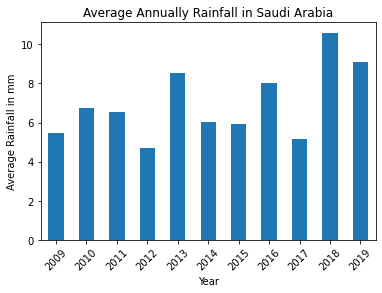

In [125]:
import matplotlib.pyplot as plt
df.groupby('Year')['Rainfall'].mean().plot.bar()
plt.title('Average Annually Rainfall in Saudi Arabia')
plt.ylabel('Average Rainfall in mm')
plt.xlabel('Year')
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

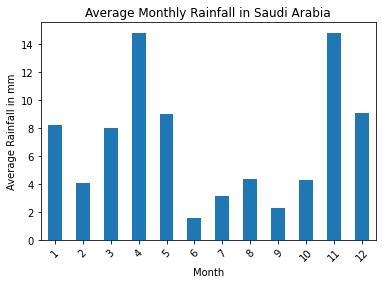

In [126]:
df.groupby('Month')['Rainfall'].mean().plot.bar()
plt.title('Average Monthly Rainfall in Saudi Arabia')
plt.ylabel('Average Rainfall in mm')
plt.xlabel('Month')
plt.grid(False)
plt.xticks(rotation=45)
plt.show()


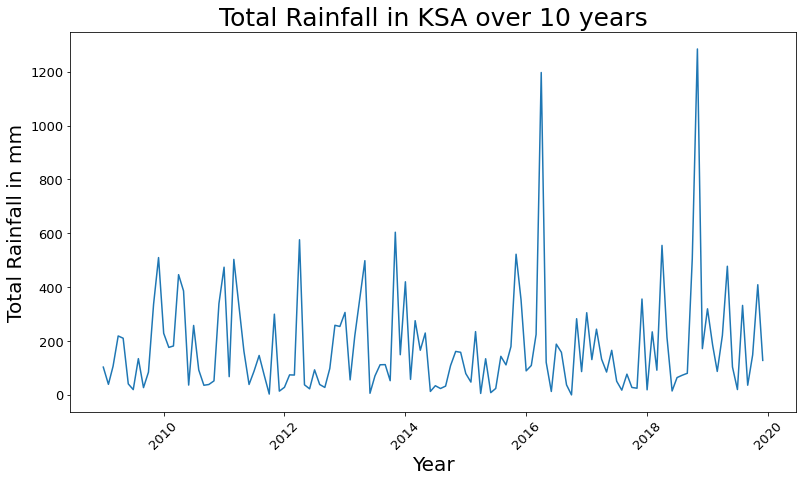

In [127]:
# Plot rainfall data over the years

import matplotlib.pyplot as plt
plt.figure(figsize=(13, 7))
plt.plot(df[['Date', 'Rainfall']].groupby(by = 'Date').sum())
plt.title('Total Rainfall in KSA over 10 years', fontsize=25)
plt.ylabel('Total Rainfall in mm', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.grid(False)
plt.xticks(rotation=45)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()




# Modeling Process

In [ ]:
# create train/test split
train, test = train_test_split(df, train_size=0.7, random_state=123)

# separate features from labels and only use numeric features
X_train = train.drop("Rainfall", axis=1)
y_train = train[["Rainfall"]]


